In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [40]:
dados = pd.read_csv('../data/processed/csv_limpo.csv')

Artista com mais aparições e maior média de faturamento bruto

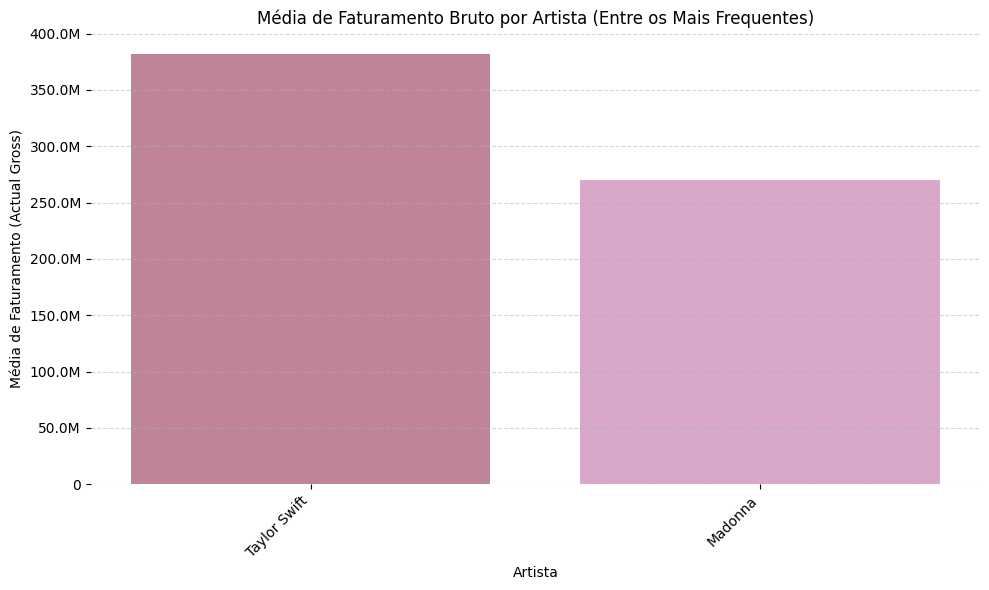

In [80]:
artista_count = dados['Artist'].value_counts()
mais_frequentes = artista_count[artista_count == artista_count.max()].index
dados_frequentes = dados[dados['Artist'].isin(mais_frequentes)]

medias = dados_frequentes.groupby('Artist')['Actual gross'].mean()

artista_maior_media = medias.idxmax()
maior_media_valor = medias.max()

palette = [
    "#C08497",
    "#D8A7CA", 
    "#B3A2C7", 
    "#9A8FBF", 
    "#7A6F9B",
    "#6E6A86", 
    "#A6979C", 
    "#4A4453", 
    "#BFBFBF", 
    "#000000"
]

medias_ordenadas = medias.sort_values(ascending=False)

colors = palette[:len(medias_ordenadas.index)]  # 10 cores do colormap

plt.figure(figsize=(10,6))
plt.bar(medias_ordenadas.index, medias_ordenadas.values, color=colors)

plt.title('Média de Faturamento Bruto por Artista (Entre os Mais Frequentes)')
plt.xlabel('Artista')
plt.ylabel('Média de Faturamento (Actual Gross)')
plt.xticks(rotation=45, ha='right')

# Formatar valores do eixo y
def formatar_numero(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.1f}K'
    return int(x)

formatter = FuncFormatter(formatar_numero)

plt.gca().yaxis.set_major_formatter(formatter)

#Removendo as bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('../outputs/maior_media_faturamento_artista.png')

plt.show()

Determinar a turnê com maior média de faturamento dentro de um único ano


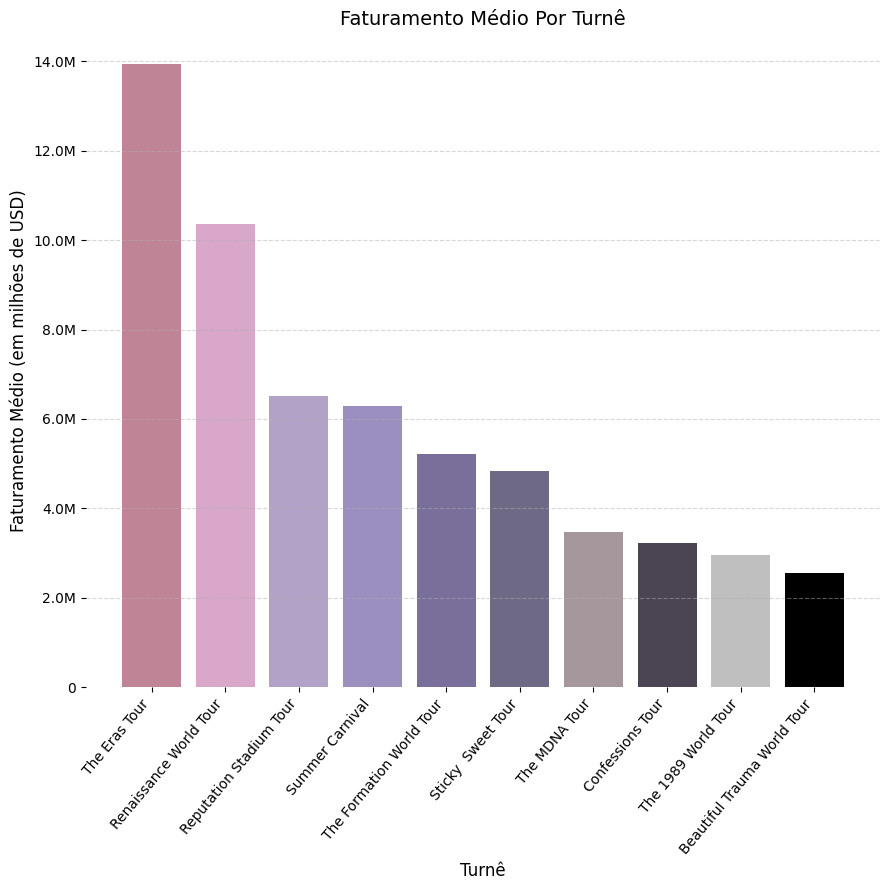

In [82]:
maior_faturamento_medio = dados.groupby('Tour title')['Average gross'].mean().sort_values(ascending=False).head(10)

palette = [
    "#C08497",
    "#D8A7CA", 
    "#B3A2C7", 
    "#9A8FBF", 
    "#7A6F9B",
    "#6E6A86", 
    "#A6979C", 
    "#4A4453", 
    "#BFBFBF", 
    "#000000"
]

plt.figure(figsize=(9,9))
plt.title('Faturamento Médio Por Turnê', fontsize=14)

plt.bar(maior_faturamento_medio.index, maior_faturamento_medio.values, color=palette)
plt.xlabel('Turnê', fontsize=12)
plt.ylabel('Faturamento Médio (em milhões de USD)', fontsize=12)
plt.xticks(rotation=50, ha='right')

# Formatar valores do eixo y
def formatar_numero(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.1f}K'
    return int(x)

formatter = FuncFormatter(formatar_numero)

plt.gca().yaxis.set_major_formatter(formatter)

#Removendo as bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('../outputs/faturamento_medio_por_tour.png', bbox_inches='tight')

plt.show()


Listar as 3 turnês mais lucrativas por show, considerando valores ajustados por ano

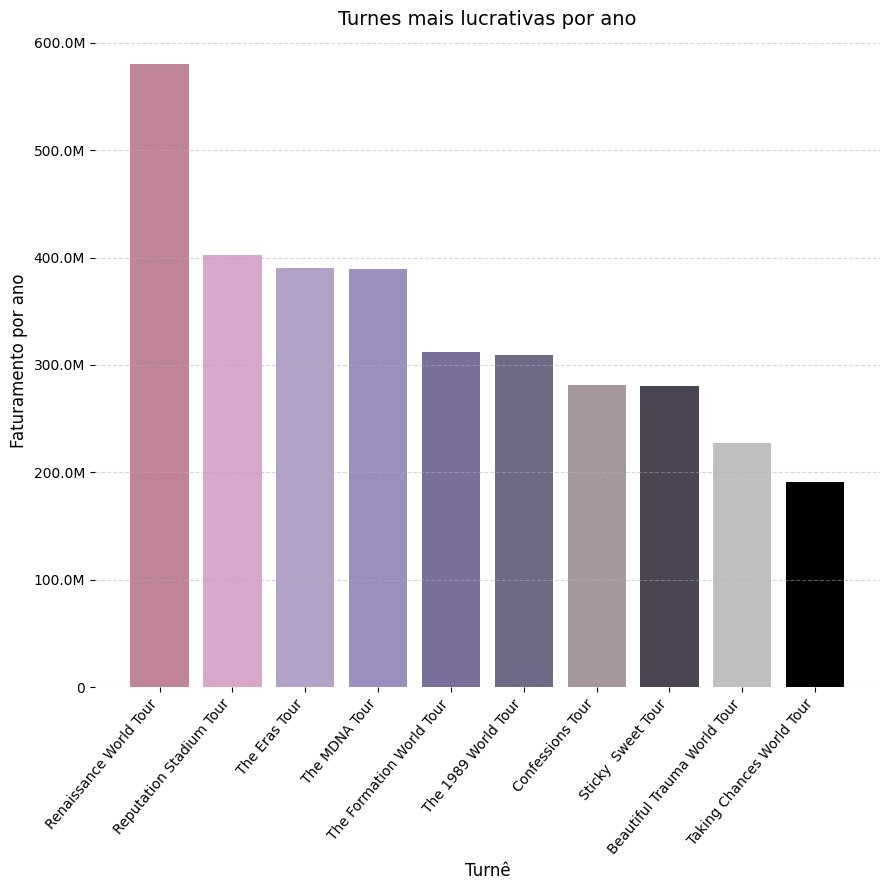

In [79]:
turnes_mais_lucrativas_ano = dados.sort_values(by='Gross per year', ascending=False).head(10)

turnes_mais_lucrativas_ano[['Artist', 'Tour title', 'Gross per year']]

palette = [
    "#C08497",
    "#D8A7CA", 
    "#B3A2C7", 
    "#9A8FBF", 
    "#7A6F9B",
    "#6E6A86", 
    "#A6979C", 
    "#4A4453", 
    "#BFBFBF", 
    "#000000"
]

plt.figure(figsize=(9,9))
plt.title('Turnes mais lucrativas por ano', fontsize=14)

plt.bar(turnes_mais_lucrativas_ano['Tour title'], turnes_mais_lucrativas_ano['Gross per year'], color=palette)
plt.xlabel('Turnê', fontsize=12)
plt.ylabel('Faturamento por ano', fontsize=12)
plt.xticks(rotation=50, ha='right')

# Formatar valores do eixo y
def formatar_numero(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.1f}K'
    return int(x)

formatter = FuncFormatter(formatar_numero)

plt.gca().yaxis.set_major_formatter(formatter)

#Removendo as bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('../outputs/turne_mais_lucrativa_ano.png')

plt.show()

Gerar gráfico de linha para a artista top mostrando faturamento por ano

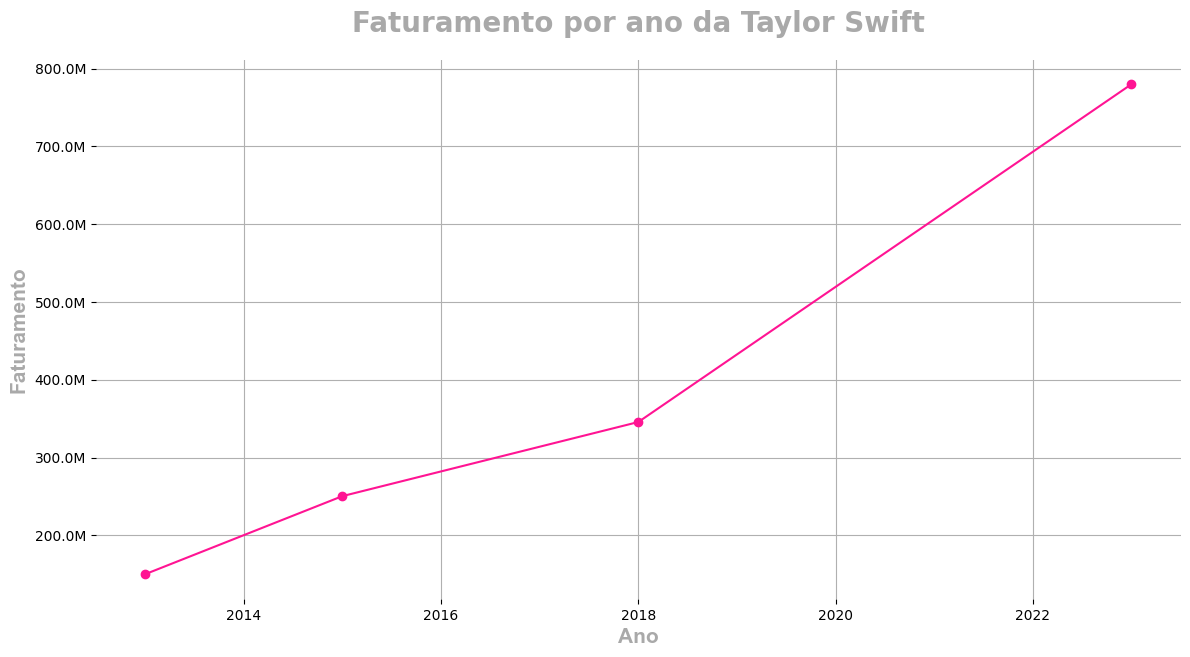

In [76]:
contagem_artistas = dados['Artist'].value_counts()

soma_faturamento = dados.groupby('Artist')['Actual gross'].sum()

top_artistas = contagem_artistas.head(5).index

artista_destaque = soma_faturamento.loc[top_artistas].idxmax()

filtro_artista = dados['Artist'] == artista_destaque

faturamento_ano = dados.loc[filtro_artista].groupby('Start year')['Actual gross'].sum()

plt.figure(figsize=(14,7))
plt.title(f'Faturamento por ano da {artista_destaque}', fontsize=20, weight='bold', color='darkgrey', pad=20, fontname='DejaVu Sans')

# Formatar valores do eixo y
def formatar_numero(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.1f}K'
    return int(x)

formatter = FuncFormatter(formatar_numero)

plt.gca().yaxis.set_major_formatter(formatter)

#Removendo as bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.plot(faturamento_ano.index, faturamento_ano.values, marker='o', color='deeppink')

plt.xlabel('Ano', fontsize=15, fontweight='bold', color='darkgrey', fontname='Arial')
plt.ylabel('Faturamento', fontsize=15, fontweight='bold', color='darkgrey', fontname='Arial')

plt.grid(True)

plt.savefig('../outputs/faturamento_ano_artista_destaque.png')

plt.show()


Exiber as 5 artistas com maior quantidade de shows em gráfico de barras

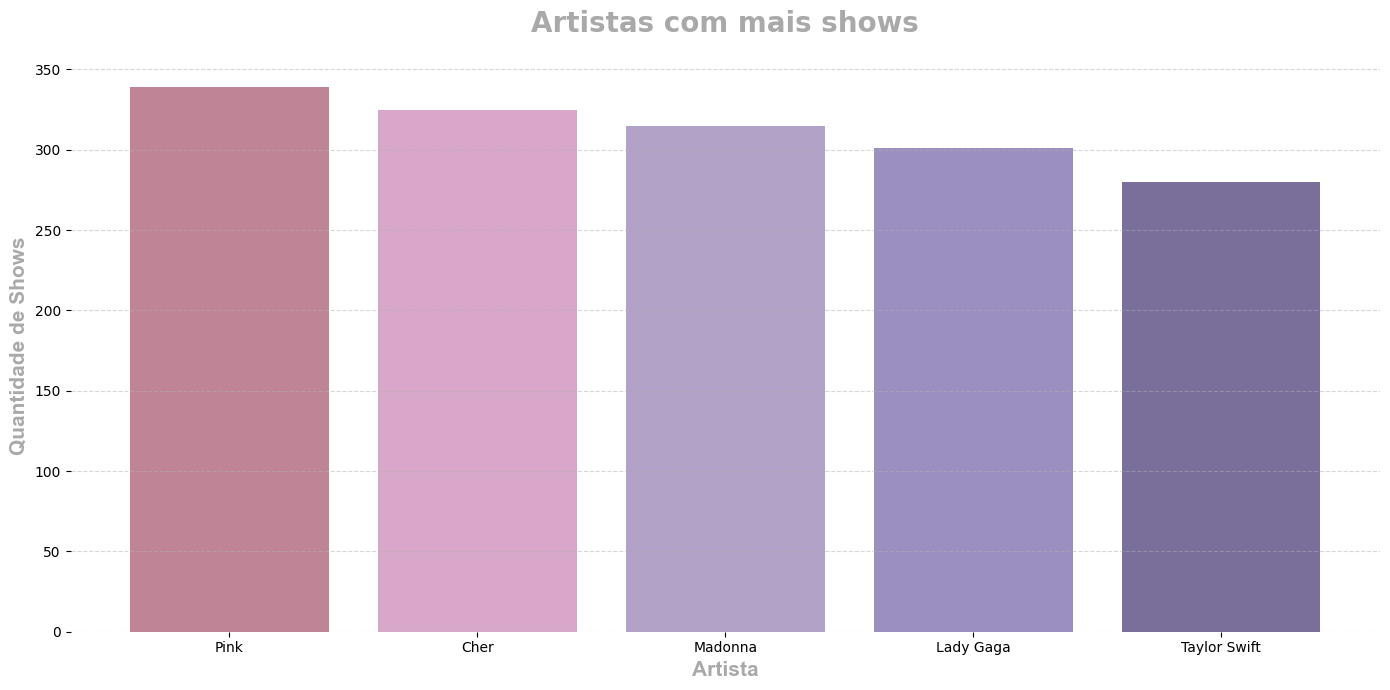

In [78]:
artista_mais_show = dados.groupby('Artist')['Shows'].sum().sort_values(ascending=False).head(5)

artista_mais_show_df = artista_mais_show.reset_index()
artista_mais_show_df.columns = ['Artist', 'Total Shows']

plt.figure(figsize=(14,7))
plt.title('Artistas com mais shows', fontsize=20, weight='bold', color='darkgrey', pad=20, fontname='DejaVu Sans')

palette = [
    "#C08497",
    "#D8A7CA", 
    "#B3A2C7", 
    "#9A8FBF", 
    "#7A6F9B",
    "#6E6A86", 
    "#A6979C", 
    "#4A4453", 
    "#BFBFBF", 
    "#000000"
]

plt.bar(artista_mais_show_df['Artist'], artista_mais_show_df['Total Shows'], color=palette)

plt.xlabel('Artista', fontsize=15, fontweight='bold', color='darkgrey', fontname='Arial')
plt.ylabel('Quantidade de Shows', fontsize=15, fontweight='bold', color='darkgrey', fontname='Arial')

#Removendo as bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('../outputs/artistas_mais_shows.png')

plt.show()